<a href="https://colab.research.google.com/github/kuakua5269/ML_DL/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[波士頓房價資料練習](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) -> 因為B的資料欄位將被刪除

---

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城鎮非零售業商用土地比例

CHAS：是否鄰近查爾斯河，1是鄰近，0是不鄰近

NOX：一氧化氮濃度（千萬分之一）

RM：住宅的平均房間數

AGE：自住且建於1940年前的房屋比例

DIS：到5個波士頓就業中心的加權距離

RAD：到高速公路的便捷度指數

TAX：每萬元的房產稅率

PTRATIO：城鎮學生教師比例

B： 1000(Bk − 0.63)2 其中Bk是城鎮中黑人比例

LSTAT：低收入人群比例

ans：自住房中位數價格，單位是千元


In [21]:
import pandas as pd # 整理資料必用pandas
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['ans'] = boston['target']
df.to_csv('boston.csv', encoding='utf-8', index=False)
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


把資料切成 訓練資料／測試資料

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
x = np.array(df.drop(['ans'], axis=1))
y = np.array(df['ans'])
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size=0.1)

將分類器改成[迴歸器](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn-tree-decisiontreeregressor) -> 將資料fit一下！

In [23]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=6) # max_depth設定來防止過擬合！！！
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

訓練結果繪圖

[Text(0.5, 0.875, 'LSTAT <= 9.725\nsquared_error = 80.654\nsamples = 455\nvalue = 22.409'),
 Text(0.25, 0.625, 'RM <= 6.941\nsquared_error = 77.256\nsamples = 190\nvalue = 29.369'),
 Text(0.125, 0.375, 'DIS <= 1.485\nsquared_error = 33.593\nsamples = 130\nvalue = 25.352'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'RM <= 7.437\nsquared_error = 61.166\nsamples = 60\nvalue = 38.072'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'LSTAT <= 16.085\nsquared_error = 23.455\nsamples = 265\nvalue = 17.418'),
 Text(0.625, 0.375, 'B <= 116.025\nsquared_error = 9.671\nsamples = 137\nvalue = 20.399'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'NOX <= 0.603\nsquared_error = 18.529\nsamples = 128\nvalue = 14.229'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

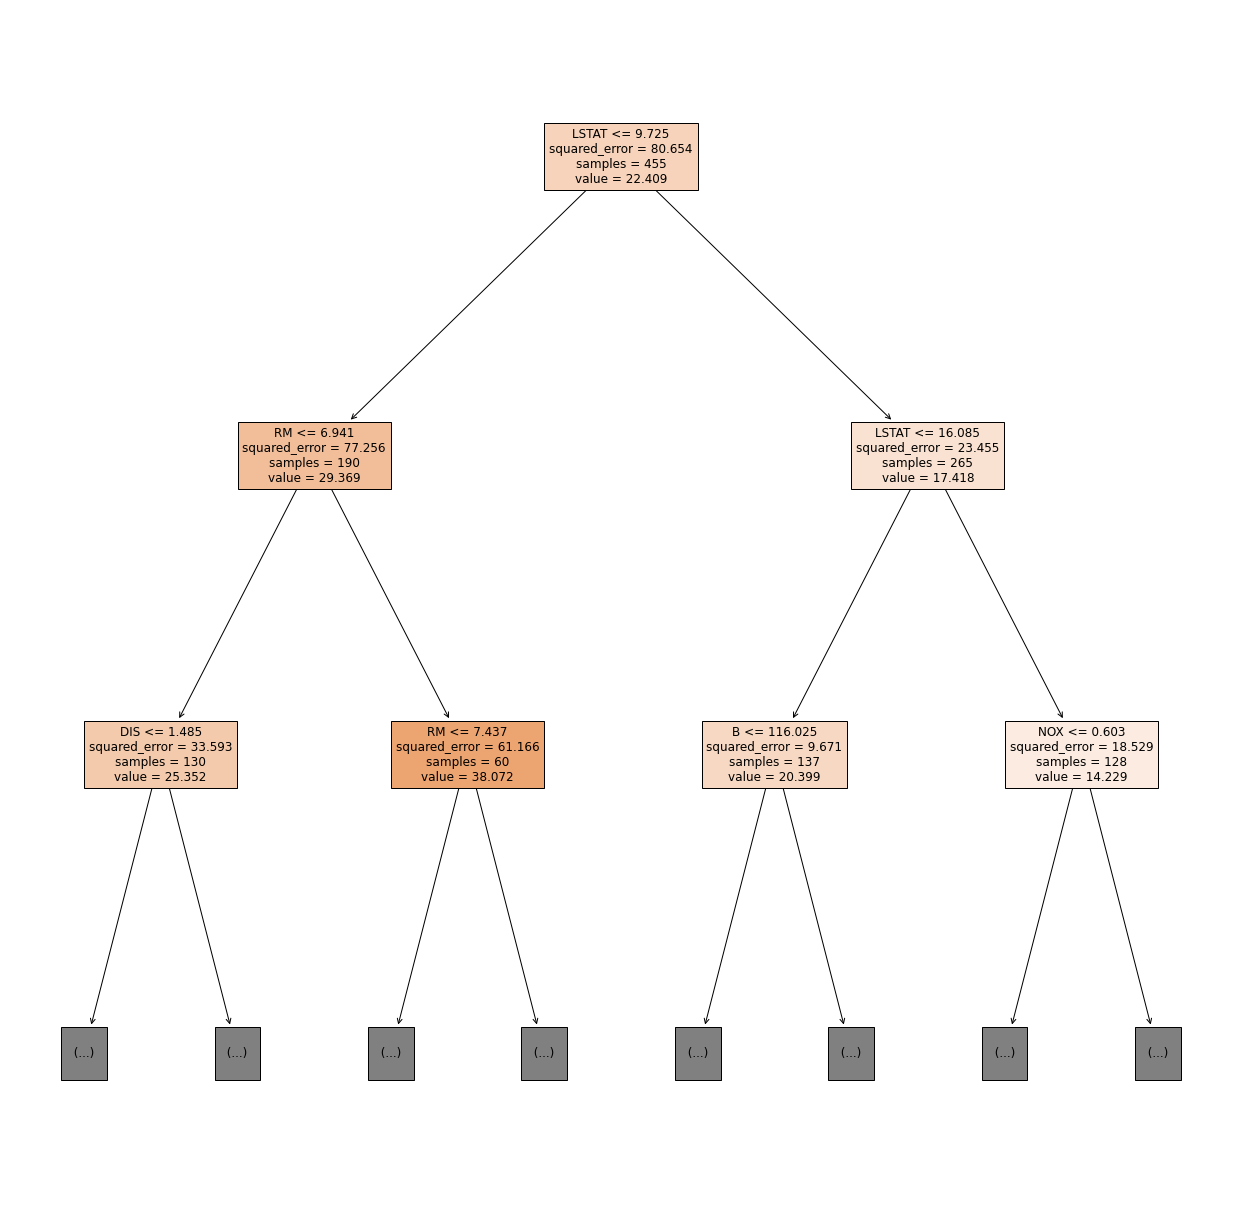

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(22,22))
plot_tree(reg, 
          feature_names=boston['feature_names'], 
          filled=True,
          max_depth=2)

驗證預測結果的好壞 -> [.r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2_score#sklearn-metrics-r2-score)

In [25]:
pre = reg.predict(x_test)
print('預測結果：', list(pre))
print('真正標籤：', list(y_test))

預測結果： [16.881818181818183, 13.125, 15.537931034482757, 27.075000000000003, 20.958064516129028, 46.58333333333332, 15.2, 32.86153846153846, 42.2, 32.86153846153846, 19.343999999999998, 32.55, 19.967567567567567, 19.343999999999998, 42.2, 19.343999999999998, 21.320967741935483, 19.343999999999998, 8.172222222222224, 21.320967741935483, 46.58333333333332, 20.958064516129028, 29.483333333333334, 21.320967741935483, 46.58333333333332, 11.7, 19.343999999999998, 13.200000000000003, 19.343999999999998, 16.881818181818183, 13.200000000000003, 23.2, 21.320967741935483, 20.28666666666667, 19.343999999999998, 19.967567567567567, 8.172222222222224, 24.5125, 23.73673469387756, 24.5125, 32.55, 29.483333333333334, 21.320967741935483, 50.0, 42.2, 19.967567567567567, 21.320967741935483, 19.343999999999998, 23.73673469387756, 32.86153846153846, 23.73673469387756]
真正標籤： [17.1, 13.6, 15.1, 29.0, 24.3, 35.2, 15.6, 36.4, 50.0, 32.2, 18.8, 26.6, 17.1, 19.7, 44.8, 21.7, 16.8, 16.3, 10.5, 18.5, 48.5, 19.6, 29.8

In [26]:
from sklearn.metrics import r2_score
check = r2_score(y_test, pre)
print('準確率為：', check)

準確率為： 0.8544496998328516
